# Task 2.1 – Scaling

## Feature Scaling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables.



Let's take a closer look at our data set:

In [1]:
import pandas as pd

df = pd.read_csv('./data/2_1_loans.csv')

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114bea0b8>,
      dtype=object)

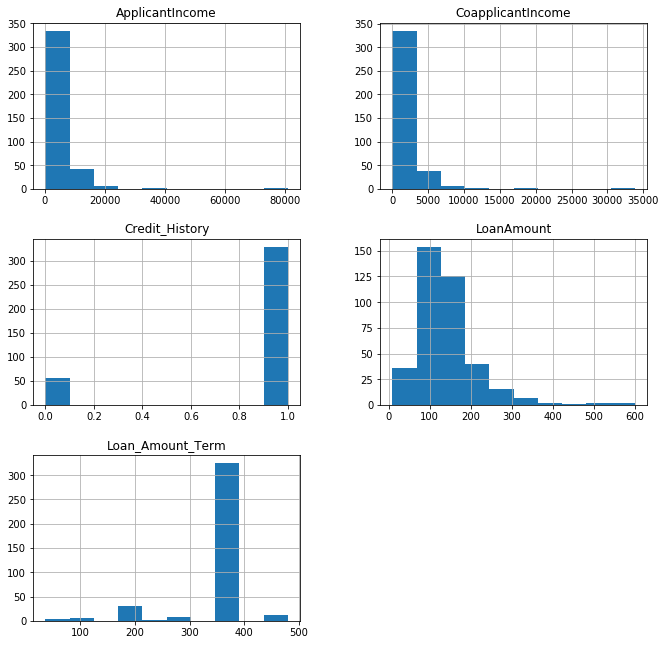

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

df_num.hist(figsize=[11,11])

After understanding these plots, we infer that `ApplicantIncom` and `CoapplicantIncome` are in similar range where as `LoanAmount` ranges from `0` to `600$`. The story for `Loan_Amount_Term` is completely different from other variables because its unit is months as opposed to other variables where the unit is dollars.

If we try to apply distance based methods on these features, the feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling. Let’s do it practically.

sklearn provides a tool `MinMaxScale` that will scale down all the features between 0 and 1.

In [4]:
# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# initializing it
min_max = MinMaxScaler()

# fitting it to the dataset and transforming the dataset
df_scaled = min_max.fit_transform(df_num)

# result is not a DataFrame anymore...
df_scaled

array([[0.0593692 , 0.        , 0.1962775 , 0.72972973, 1.        ],
       [0.03379097, 0.054467  , 0.1928934 , 1.        , 1.        ],
       [0.03525046, 0.10095458, 0.07952623, 0.32432432, 1.        ],
       ...,
       [0.07140383, 0.06070278, 0.34179357, 0.72972973, 1.        ],
       [0.03489177, 0.08248367, 0.2284264 , 0.72972973, 1.        ],
       [0.05482993, 0.16623814, 0.41624365, 0.72972973, 1.        ]])

### Task 2.1-1

1. Transform scaled data into a pandas Dataframe (with column headers)
* Try to rescale the feature `ApplicantIncome` and `LoanAmount` to a range between -10 and 10. *Note: take a look into the [MinMaxScaler docs](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)*

In [5]:
# Transform scaled data into a pandas Dataframe (with column headers)
column_headers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_scaled_new = pd.DataFrame(df_scaled, columns=column_headers)
df_scaled_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.059369,0.000000,0.196277,0.729730,1.0
1,0.033791,0.054467,0.192893,1.000000,1.0
2,0.035250,0.100955,0.079526,0.324324,1.0
3,0.118157,0.000000,0.174281,0.729730,1.0
4,0.027001,0.071431,0.214890,0.729730,1.0


In [6]:
# Try to rescale the feature LoanAmount to a range between -10 and 10.
min_max = MinMaxScaler(feature_range=(-10, 10))
df_scaled2 = min_max.fit_transform(df_num[['ApplicantIncome', 'Loan_Amount_Term']])
pd.DataFrame(df_scaled2, columns=['ApplicantIncome', 'Loan_Amount_Term']).head()

,ApplicantIncome,Loan_Amount_Term
0,-8.812616,4.594595
1,-9.324181,10.000000
2,-9.294991,-3.513514
3,-7.636858,4.594595
4,-9.459988,4.594595


## Standardization
Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

Some methods assume that all the features are centered around zero and have variance in the same order.

Features having larger order of variance would dominate on the objective function as it happened in the previous section with the feature having large range.

### Task 2.1-2

1. Apply [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) to `df_num`.
* Compare mean and standard deviation for the two applied scalers. What's the difference?

In [7]:
# Apply StandardScaler to df_num.
from sklearn.preprocessing import StandardScaler

# initializing it
standardizer = StandardScaler()

# fitting it to the dataset and transforming the dataset
df_scaled_z = standardizer.fit_transform(df_num)

df_scaled_new_z = pd.DataFrame(df_scaled_z, columns=column_headers)

# Compare mean and standard deviation for the two applied scalers.
df_scaled_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.061839,0.046460,0.224148,0.689400,0.856771
std,0.065614,0.077555,0.127202,0.148303,0.350763
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033998,0.000000,0.153976,0.729730,1.000000
50%,0.046302,0.035124,0.201354,0.729730,1.000000
75%,0.070124,0.066769,0.262690,0.729730,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_scaled_new_z.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,4.336809e-19,8.673617e-18,1.063964e-16,1.191177e-16,-2.625215e-16
std,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00
min,-9.436975e-01,-5.998457e-01,-1.764442e+00,-4.654649e+00,-2.445776e+00
25%,-4.248706e-01,-5.998457e-01,-5.523746e-01,2.722934e-01,4.088683e-01
50%,-2.371114e-01,-1.463589e-01,-1.794307e-01,2.722934e-01,4.088683e-01
75%,1.264213e-01,2.621990e-01,3.033984e-01,2.722934e-01,4.088683e-01
max,1.431675e+01,1.231108e+01,6.107337e+00,2.097087e+00,4.088683e-01


**Note**: Choosing between scaling and standardizing is a confusing choice, you have to dive deeper in your data and learner that you are going to use to reach the decision. For starters, you can try both the methods and check validation scores for making a choice.

## Binarization

Binarization refers to a method that binarizes data (set feature values to 0 or 1) according to a threshold.
Values greater than the threshold map to 1, while values less than or equal to the threshold map to 0. With the default threshold of 0, only positive values map to 1.

### Task 2.1-3

Apply a [Binarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer) with a threshold of 1 to `df_num`.

In [9]:
# Apply Binarizer to df_num.
from sklearn.preprocessing import Binarizer

# initializing it
binarizer = Binarizer()

# fitting it to the dataset and transforming the dataset
df_binarized = binarizer.fit_transform(df_num)

df_binarized_new = pd.DataFrame(df_binarized, columns=column_headers)

df_binarized_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.0,384.000000,384.0,384.0,384.000000
mean,1.0,0.552083,1.0,1.0,0.856771
std,0.0,0.497929,0.0,0.0,0.350763
min,1.0,0.000000,1.0,1.0,0.000000
25%,1.0,0.000000,1.0,1.0,1.000000
50%,1.0,1.000000,1.0,1.0,1.000000
75%,1.0,1.000000,1.0,1.0,1.000000
max,1.0,1.000000,1.0,1.0,1.000000
